# **Cross-validation example: parameter tuning**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = datasets.load_iris()
df = pd.DataFrame(data=np.c_[data.data,data.target],columns=[list(data.feature_names)+["target"]])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
df.columns = ["sepal_length","sepal_width","petal_length","petal_width","target"]

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
df.shape

(150, 5)

# Split the features and level

In [6]:
features = df.iloc[:,0:-1]
level = df.iloc[:,-1]

# Apply train_test_split

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(features,level,test_size=.2,random_state=20)

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
knn.score(xtest,ytest)

0.9666666666666667

In [10]:
y_pred = knn.predict(xtest)
y_pred

array([0., 1., 1., 2., 1., 1., 2., 0., 2., 0., 2., 1., 2., 0., 0., 2., 0.,
       1., 2., 1., 1., 2., 2., 0., 2., 1., 1., 0., 2., 2.])

In [11]:
accuracy = accuracy_score(ytest,y_pred)
accuracy

0.9666666666666667

# Now apply **cross_validtion**

In [17]:
knn2 = KNeighborsClassifier(n_neighbors=5)

In [18]:
cvs = cross_val_score(estimator=knn2,X=features,y=level,scoring="accuracy",cv=10)

In [19]:
cvs

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [20]:
# Average accuracy
print(cvs.mean())

0.9666666666666668


# Our goal here is to find the optimal value of **K**

In [21]:
# search for an optimal value of K for KNN
k_range = range(1,31)
k_scores = []
# we will loop through reasonable values of k
for k in k_range:
  knn3 = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(estimator=knn3,X=features,y=level,scoring="accuracy",cv=10)
  k_scores.append(scores.mean())

In [22]:
k_scores

[0.96,
 0.9533333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9800000000000001,
 0.9666666666666666,
 0.9666666666666666,
 0.9733333333333334,
 0.96,
 0.9666666666666666,
 0.96,
 0.9666666666666666,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334]

In [23]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.9800000000000001


# plot how accuracy changes as we vary **k**

Text(0, 0.5, 'Cross-validated accuracy')

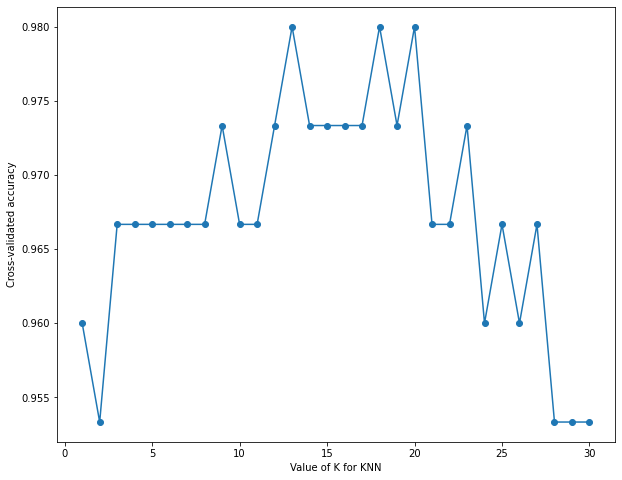

In [31]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.figure(figsize=(10,8))
plt.plot(k_range,k_scores)
plt.scatter(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [32]:
# The maximum cv accuracy occurs from k=13 to k=20

# The general shape of the curve is an upside down yield

# This is quite typical when examining the model complexity and accuracy
# This is an example of bias-variance trade off
# Low values of k (low bias, high variance)
# The 1-Nearest Neighbor classifier is the most complex nearest neighbor model
# It has the most jagged decision boundary, and is most likely to overfit
# High values of k (high bias, low variance)
# underfit
# Best value is the middle of k (most likely to generalize out-of-sample data)
# just right
# The best value of k

# Higher values of k produce less complex model
# So we will choose 20 as our best KNN model

In [35]:
knn4 = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn4, features, level, cv=10, scoring='accuracy').mean())

0.9800000000000001
